# Decision Tree with Tree visualization

In this Model I intend to visualize Acceptance rate to Medical school based on Sex

Install dtreeviz

In [1]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

     |████████████████████████████████| 62 kB 624 kB/s 


Import the dtreeviz, IPython's imahe display and pandas


In [2]:
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
import pandas as pd

Import the dataset from Github

In [3]:
# preamble to be able to run notebooks in Jupyter and Colab
try:
    from google.colab import drive
    import sys
    
    drive.mount('/content/drive')
    notes_home = "/content/drive/CSC310/notes/assets"
    user_home = "/content/drive/My Drive/"
    
    sys.path.insert(1,notes_home) # let the notebook access the notes folder

except ModuleNotFoundError:
    notes_home = "" # running native Jupyter environment -- notes home is the same as the notebook
    user_home = ""  # under Jupyter we assume the user directory is the same as the notebook

Mounted at /content/drive


In [4]:
import os
os.getcwd()

'/content'

In [5]:
os.chdir("/content/drive/My Drive//CSC310/notes")

In [6]:

import pandas as pd
from sklearn import tree
from assets.treeviz import tree_print
from sklearn.metrics import accuracy_score

In [7]:
df = pd.read_csv( "/content/drive/My Drive/CSC310/notes/assets/MedGPA.csv")

In [ ]:
df[:10]

,Unnamed: 0,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
0,1,D,0,F,3.59,3.62,11,9,9.0,9,38,5
1,2,A,1,M,3.75,3.84,12,13,8.0,12,45,3
2,3,A,1,F,3.24,3.23,9,10,5.0,9,33,19
3,4,A,1,F,3.74,3.69,12,11,7.0,10,40,5
4,5,A,1,F,3.53,3.38,9,11,4.0,11,35,11
5,6,A,1,M,3.59,3.72,10,9,7.0,10,36,5
6,7,A,1,M,3.85,3.89,11,12,6.0,11,40,5
7,8,D,0,M,3.26,3.34,11,11,8.0,9,39,7
8,9,A,1,F,3.74,3.71,8,10,6.0,11,35,5
9,10,A,1,F,3.86,3.89,9,9,6.0,10,34,11


Seperate the target column 'Unnamed: 0' from the rest of the dataset. Create the features(X) and the target(y)

In [8]:
features_df = df.drop(['Unnamed: 0','Accept','Sex',"WS"],axis=1)# features
features_df.head()

,Acceptance,BCPM,GPA,VR,PS,BS,MCAT,Apps
0,0,3.59,3.62,11,9,9,38,5
1,1,3.75,3.84,12,13,12,45,3
2,1,3.24,3.23,9,10,9,33,19
3,1,3.74,3.69,12,11,10,40,5
4,1,3.53,3.38,9,11,11,35,11


In [9]:
target_df = pd.DataFrame(df['Acceptance']) # Target
target_df.head()

,Acceptance
0,0
1,1
2,1
3,1
4,1


In [10]:
import numpy as np
target_df= target_df.to_numpy()
target_df= target_df.flatten()
target_df

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [11]:
dtree = tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(features_df,target_df)

DecisionTreeClassifier(criterion='entropy')

In [13]:
viz = dtreeviz(dtree, # The model we have just created
               features_df, # Training featues(dataframe)
               target_df,  # Target(1D numpy array)
               target_name='Sex',
               feature_names= features_df.columns, # Name of the features
               class_names= ["F", "M"] # need class_names for classifier
              )  

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


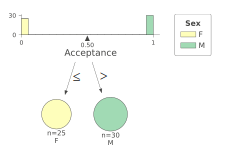

In [14]:
viz

Check for accuracy


In [15]:
from sklearn.metrics import accuracy_score
predicted_labels = dtree.predict(features_df)  #predicts a label for the features 

#Test for accuracy
print("Our model accuracy is: {}".format(accuracy_score(target_df, predicted_labels
                                                        )))

Our model accuracy is: 1.0


Accuracy is 100%

In [16]:
predicted_labels

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [17]:
target_df

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

Build a tree that's not fully grown

In [18]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
dtree.fit(features_df,target_df)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


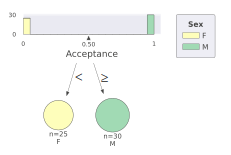

In [ ]:
viz = dtreeviz(dtree, # The model we have just created
               features_df, # Training featues(dataframe)
               target_df,  # Target(1D numpy array)
               target_name='Sex',
               feature_names=features_df.columns, # Name of the features
               class_names= ["F", "M"] # need class_names for classifier
              )  
viz

In [19]:
predicted_labels = dtree.predict(features_df)  #predicts a label for the features 

#Test for accuracy
print("Our model accuracy is: {}".format(accuracy_score(target_df, predicted_labels
                                                        )))

Our model accuracy is: 1.0


The model still 100% accuracy

# Data Visualization

Use the visualization tools set to look at the data set.

- Are your independent variables uni- or multimodal?
        My independent vriables are Multimodel


In [20]:
# Access to matplotlib as the underlying visualization library:
%matplotlib inline  

In [21]:
features_df2 = df.drop(['Unnamed: 0','Accept',"WS","BCPM","VR","PS","BS","MCAT","Apps"],axis=1)# features
features_df2[:10]

,Acceptance,Sex,GPA
0,0,F,3.62
1,1,M,3.84
2,1,F,3.23
3,1,F,3.69
4,1,F,3.38
5,1,M,3.72
6,1,M,3.89
7,0,M,3.34
8,1,F,3.71
9,1,F,3.89


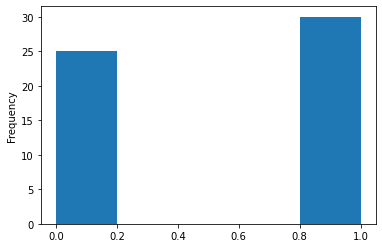

In [22]:
# Histogram
features_df2.loc[:,'Acceptance'].plot.hist(bins=5)

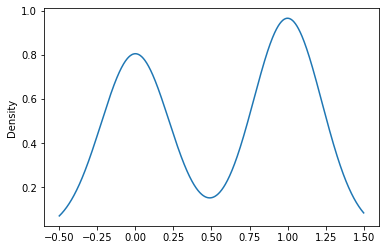

In [23]:
# The Density Plot
features_df2.loc[:,'Acceptance'].plot.kde()

In [ ]:
# The Bar Chart
features_df2.loc[:,'Sex'].value_counts()

F    28
M    27
Name: Sex, dtype: int64

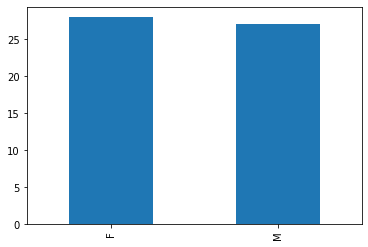

In [24]:
features_df2.loc[:,'Sex'].value_counts().plot.bar()

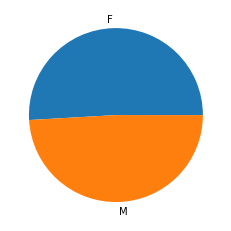

In [25]:
# The Pie Chart
plot_series = features_df2.loc[:,'Sex'].rename('') # get rid of the 'Sex' label
plot_series.value_counts().plot.pie() # plot the value counts of the labels

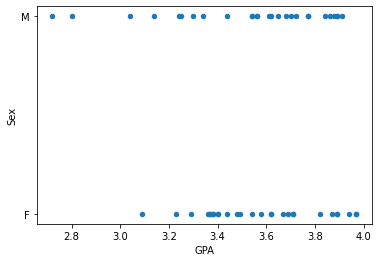

In [26]:
# Scatter Plots
features_df2.plot.scatter(x='GPA', y='Sex')

- Can you identify clusters when performing scatter plots?
      The Top cluster reprisents the GPA of Male students that tend to get Accept into Medical school.  
      The Botton cluster reprisents the GPA of Female students that tend to get Accept into Medical school.  


* Are those clusters related to your decision tree model from the last lab?
      Yes, these clusters relates to my decision tree model from the last Lab

* What about the different labels/levels of your dependent variable - are they equally represented, that is, is your data set well balanced? If so why, if not how do you think the imbalance shows up in your tree model?

      Yes, Based on the amount of my dependent variable, I beleive they are equally represented and the data set is 
      well balanced, because I droped those colums that might create noise in the data set. 

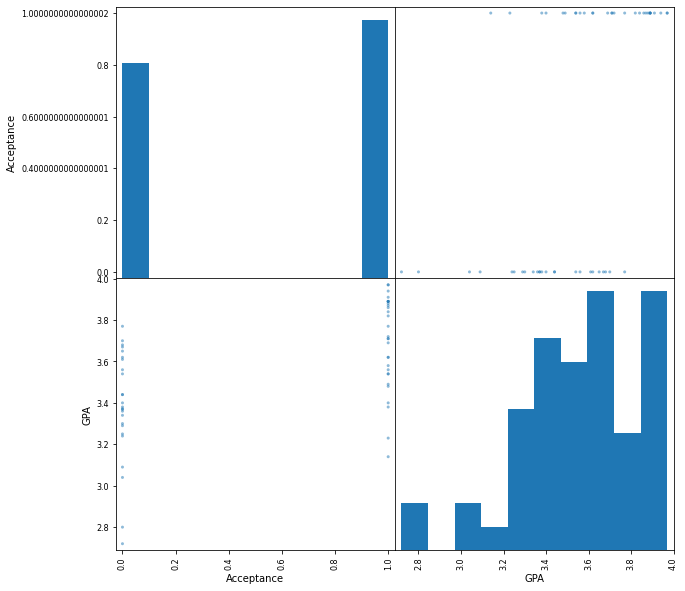

In [27]:
#Scatter Matrix
null = pd.plotting.scatter_matrix(features_df2, figsize=[10,10])

In [28]:
#Seaborn Based Visualization
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


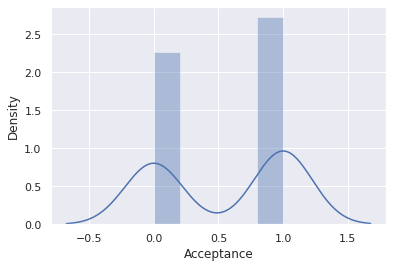

In [29]:
#Histograms
sns.distplot(features_df2.loc[:,'Acceptance'], hist=True, kde=True, bins=5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


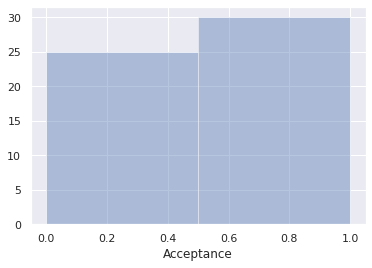

In [30]:
sns.distplot(features_df2.loc[:,'Acceptance'], hist=True, kde=False, bins=None)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


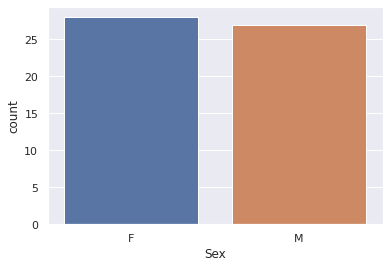

In [31]:
# Bar Charts
sns.countplot(features_df2.loc[:,'Sex'])

In [ ]:
# Scatter Plots

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


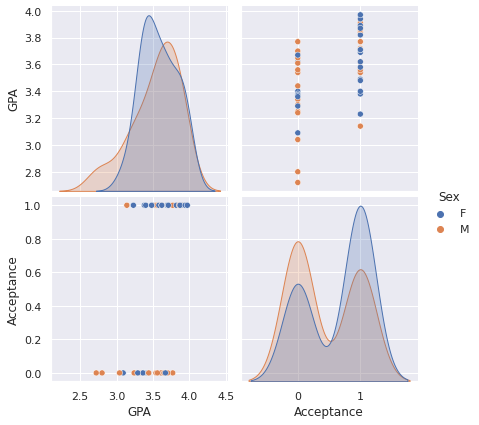

In [32]:
# Looking at individual pairs of variables.
sns.pairplot(features_df2, hue='Sex', size=3, vars=["GPA", "Acceptance"])

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


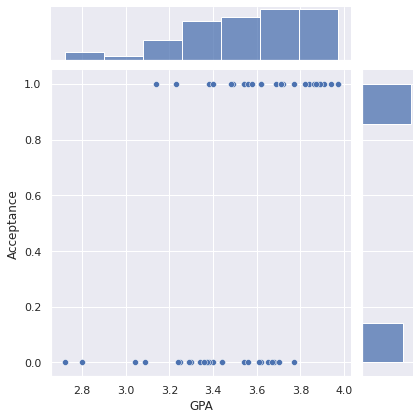

In [33]:
# Also jointplot which allows to compare two variables, where is one that draws a scatterplot with marginal histograms.
sns.jointplot(x="GPA", y="Acceptance", data=features_df2, size=6)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


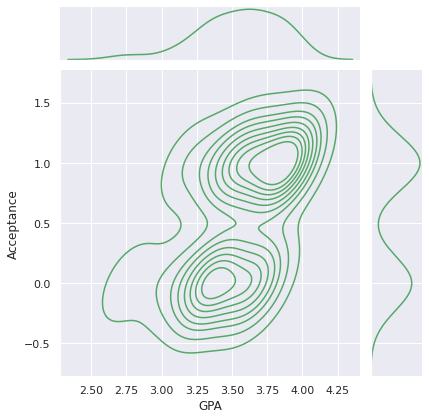

In [34]:
sns.jointplot(x="GPA", y="Acceptance", data=features_df2, size=6, kind="kde", color="g")


# Part 2 - Decision tree model 
Find the simplest decision tree model whose accuracy is at least 80% of the accuracy of the best model you built in the previous assignment. E.g. if your best model had an accuracy of 0.95 then the simplified model should have an accuracy of not less than 0.95*0.8=0.75.

How do the best decision tree model from your last assignment and your new, simplified model compare in terms of interpretability?
 *  This Model is much miore readable comparing to my last assignment 
 becuse the visualization redu the ambiguity in the data set 


In [35]:
features_df2.head()

,Acceptance,Sex,GPA
0,0,F,3.62
1,1,M,3.84
2,1,F,3.23
3,1,F,3.69
4,1,F,3.38


In [36]:
features_df3 = features_df2.drop(['Acceptance',"Sex"],axis=1)# features
features_df3.head()

,GPA
0,3.62
1,3.84
2,3.23
3,3.69
4,3.38


In [37]:
target_df3 = pd.DataFrame(features_df2['Acceptance']) 
target_df3.head()

,Acceptance
0,0
1,1
2,1
3,1
4,1


In [38]:
dtree = tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(features_df3,target_df3)
tree_print(dtree,features_df3)

if GPA =< 3.7050000429153442: 
  |then if GPA =< 3.375: 
  |  |then if GPA =< 3.2350000143051147: 
  |  |  |then if GPA =< 3.115000009536743: 
  |  |  |  |then 0
  |  |  |  |else 1
  |  |  |else 0
  |  |else if GPA =< 3.634999990463257: 
  |  |  |then if GPA =< 3.4600000381469727: 
  |  |  |  |then if GPA =< 3.4200000762939453: 
  |  |  |  |  |then if GPA =< 3.390000104904175: 
  |  |  |  |  |  |then 0
  |  |  |  |  |  |else 0
  |  |  |  |  |else 0
  |  |  |  |else if GPA =< 3.5149999856948853: 
  |  |  |  |  |then 1
  |  |  |  |  |else if GPA =< 3.59499990940094: 
  |  |  |  |  |  |then if GPA =< 3.569999933242798: 
  |  |  |  |  |  |  |then if GPA =< 3.549999952316284: 
  |  |  |  |  |  |  |  |then 1
  |  |  |  |  |  |  |  |else 0
  |  |  |  |  |  |  |else 1
  |  |  |  |  |  |else if GPA =< 3.6149998903274536: 
  |  |  |  |  |  |  |then 0
  |  |  |  |  |  |  |else 1
  |  |  |else if GPA =< 3.6850000619888306: 
  |  |  |  |then 0
  |  |  |  |else if GPA =< 3.6950000524520874: 
  |  | 

In [ ]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2,random_state=4)
dtree.fit(features_df3,target_df3)
tree_print(dtree,features_df3)

if GPA =< 3.7050000429153442: 
  |then if GPA =< 3.375: 
  |  |then 0
  |  |else 0
  |else if GPA =< 3.7949999570846558: 
  |  |then 1
  |  |else 1
<---->
Tree Depth:  2


In [39]:
predict_array = dtree.predict(features_df3)      # produces an array of labels
predicted_labels = pd.DataFrame(predict_array)  # turn it into a DF
predicted_labels.columns = ['Acceptance']          # name the column - same name as in target!
print("Our model accuracy is: {}".format(accuracy_score(target_df3, predicted_labels)))

Our model accuracy is: 0.8909090909090909


In [ ]:
# Let's plot our tree model ontop of the scatter plot of the M and F variables.

In [40]:

import matplotlib.pyplot as plt
shrink_df = features_df2[['Acceptance','GPA','Sex']]
shrink_df.head()

,Acceptance,GPA,Sex
0,0,3.62,F
1,1,3.84,M
2,1,3.23,F
3,1,3.69,F
4,1,3.38,F


In [41]:
Sex_df = shrink_df[shrink_df.Sex == 'sex']
F_df = shrink_df[shrink_df.Sex == 'Female']
M_df = shrink_df[shrink_df.Sex == 'Male']



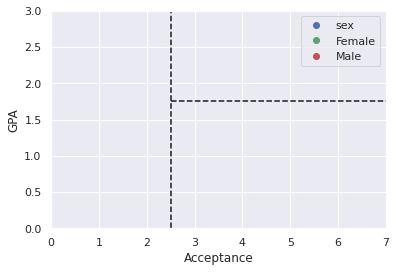

In [42]:
# scatter plot of the data
plt.plot(Sex_df['GPA'],Sex_df['Acceptance'],'bo')
plt.plot(F_df['GPA'],F_df['Acceptance'],'go')
plt.plot(M_df['GPA'],M_df['Acceptance'],'ro')
plt.axis([0, 7, 0, 3])
plt.xlabel('Acceptance')
plt.ylabel('GPA')
plt.legend(['sex','Female','Male'])

# plotting the tree decision surfaces
plt.plot([2.5,2.5],[0,3.0],'k--')
plt.plot([2.5,7.0],[1.75,1.75], 'k--')


Do they agree on the major trends/classifications?
 * I do agreed on the classification and Trends. 

 Can you relate the decision tree of the simplified model to clusters you have discovered in the previous part of this assignment?
  * Yes, because the final trends mimic the trends I had in my last Assigment


